<a href="https://colab.research.google.com/github/reidzf8/Kuliah/blob/main/DataMining/UTS-DATAMAINING/UTS_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [121]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Eksplorasi Awal
- a. Berapa jumlah total penumpang dalam data
- b. Berapa jumlah penumpang yang selamat dan tidak selamat? tampilkan dalam bentuk tabel dan grafik

In [122]:
# a. Berapa jumlah total penumpang dalam data
total_penumpang = len(df)
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


In [123]:
# b. Berapa jumlah penumpang yang selamat dan tidak selamat? tampilkan dalam bentuk tabel dan grafik
# jumlah penumpang
survival_counts = df['Survived'].value_counts()
survival_counts

,count
Survived,
0,549
1,342


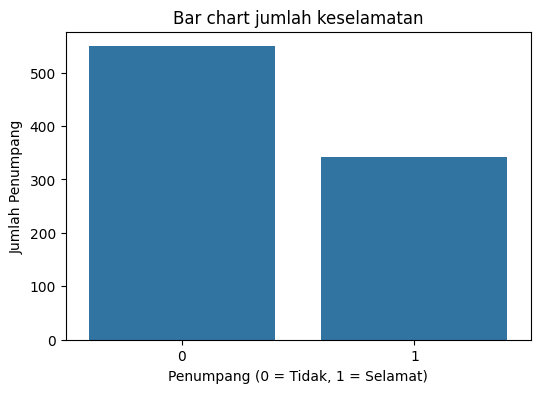

In [124]:
# Bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Bar chart jumlah keselamatan')
plt.xlabel('Penumpang (0 = Tidak, 1 = Selamat)')
plt.ylabel('Jumlah Penumpang')
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [125]:
# c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?
rata_rata_umur = df['Age'].mean()
print(f"Rata-rata umur penumpang: {rata_rata_umur}")

Rata-rata umur penumpang: 29.69911764705882


In [126]:
# termuda
penumpang_termuda = df.loc[df['Age'].idxmin(), ['Age']]
print("Penumpang termuda:", penumpang_termuda)

Penumpang termuda: Age    0.42
Name: 803, dtype: object


In [127]:
# tertua
penumpang_tertua = df.loc[df['Age'].idxmax(), ['Age']]
print("Penumpang termuda:", penumpang_tertua)

Penumpang termuda: Age    80.0
Name: 630, dtype: object


d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan

Sex
male      577
female    314
Name: count, dtype: int64


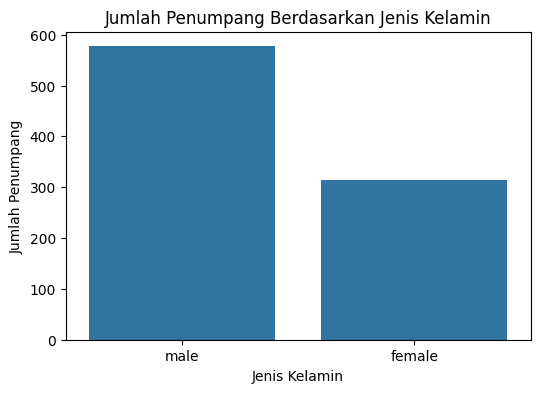

Jumlah penumpang laki-laki lebih banyak


In [128]:
# d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan
gender_counts = df['Sex'].value_counts()
print(gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

if gender_counts['male'] > gender_counts['female']:
    print("Jumlah penumpang laki-laki lebih banyak")
elif gender_counts['female'] > gender_counts['male']:
    print("Jumlah penumpang perempuan lebih banyak")
else:
    print("Jumlah penumpang laki-laki dan perempuan sama")

d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [129]:
# d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan
pclass_counts = df['Pclass'].value_counts()
print(pclass_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [130]:
# total data dikelas 1 dalam bentuk presentase
percentage_pclass1 = (pclass_counts[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di kelas 1: {percentage_pclass1:.2f}%")


Persentase penumpang di kelas 1: 24.24%


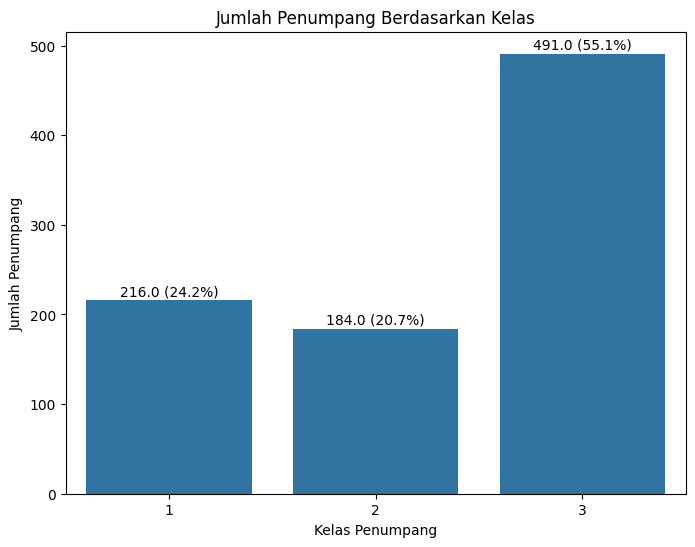

In [131]:
# Bentuk visualisasi
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Jumlah Penumpang')

# Menambahkan label persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f'{height} ({height/total_penumpang*100:.1f}%)', ha='center')

plt.show()

# 2. Preprocessing

a. Apakah terdapat missing value pada data tersebut?

terdapat missing value:
- Age: 177
- Cabin: 687
- Embarked: 2



In [132]:
# a. Apakah terdapat missing value pada data tersebut?
missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


b. Jika ya, apa yang anda lakukan?

Menangani missing value:

- Mengisi Age dengan median.

- Mengisi Embarked dengan modus (nilai yang paling sering muncul).

- Menghapus kolom yang tidak terkait dengan analisi model nantinya

In [133]:
# mengisi missing value dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [134]:
# mengisi missing value dengan mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [135]:
# Kolom yang tidak perlu untuk analisis selanjutnya
data = df.drop(columns=['Name', 'Ticket', 'Cabin'])  # hapus kolom
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [136]:
# Encode kolom kategorikal
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # male=1, female=0
data['Embarked'] = le.fit_transform(data['Embarked'])

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!

Outlier adalah data yang menyimpang jauh dari mayoritas data lainnya. Nilai-nilai ini sangat berbeda dari nilai-nilai lain dalam dataset dan dapat muncul karena
- Kesalahan pencatatan
- Variasi alami
- Kondisi ekstrem

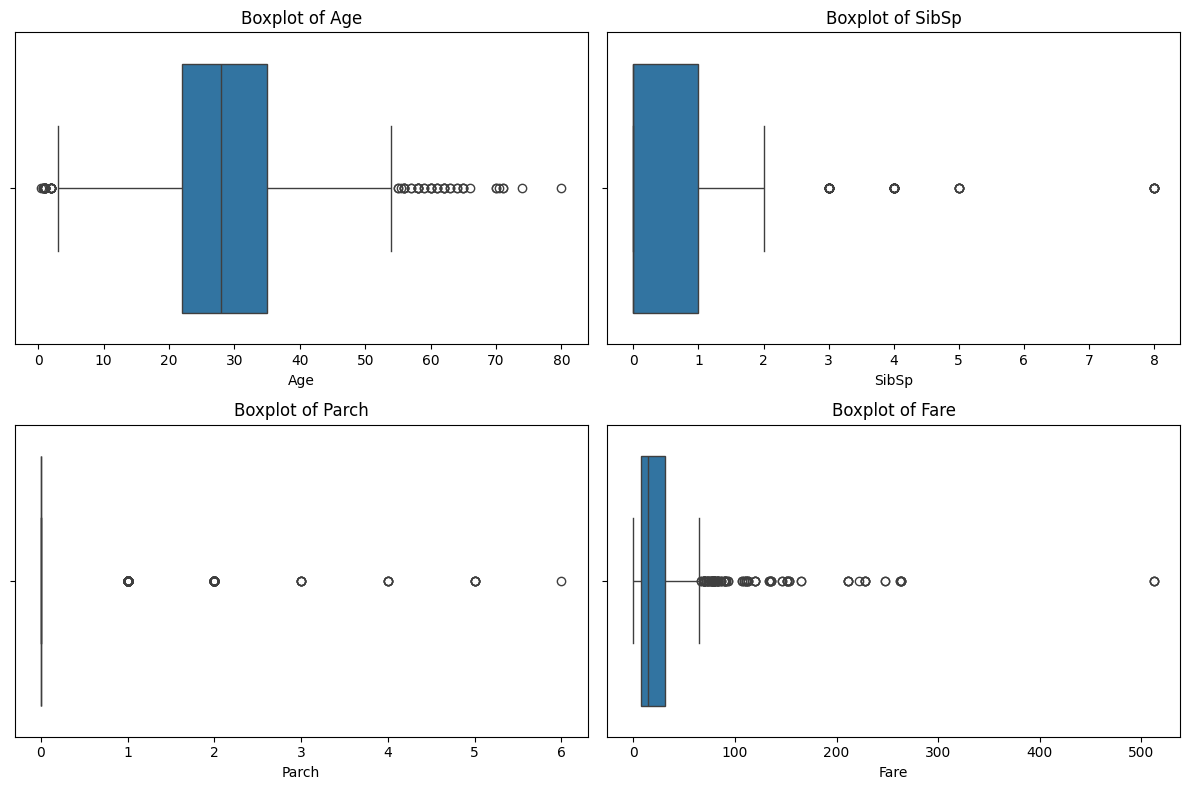

In [137]:
# Identifikasi menggunakan Boxplot
outlier = ['Age', 'SibSp', 'Parch', 'Fare']

# Buat boxplot untuk masing-masing kolom
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [138]:
# Identifikasi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek jumlah outlier untuk setiap kolom numerik
for col in outlier:
    outliers = detect_outliers_iqr(df, col) # Pass the DataFrame 'df' instead of the list 'outlier'
    print(f"{col}: {len(outliers)} outliers")

Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


d.  Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Perlu, Metode penanganan: Capping (Winsorizing)



In [139]:
# Winsorizing (Mengganti Outlier)
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in outlier:
    winsorize_iqr(data, col)

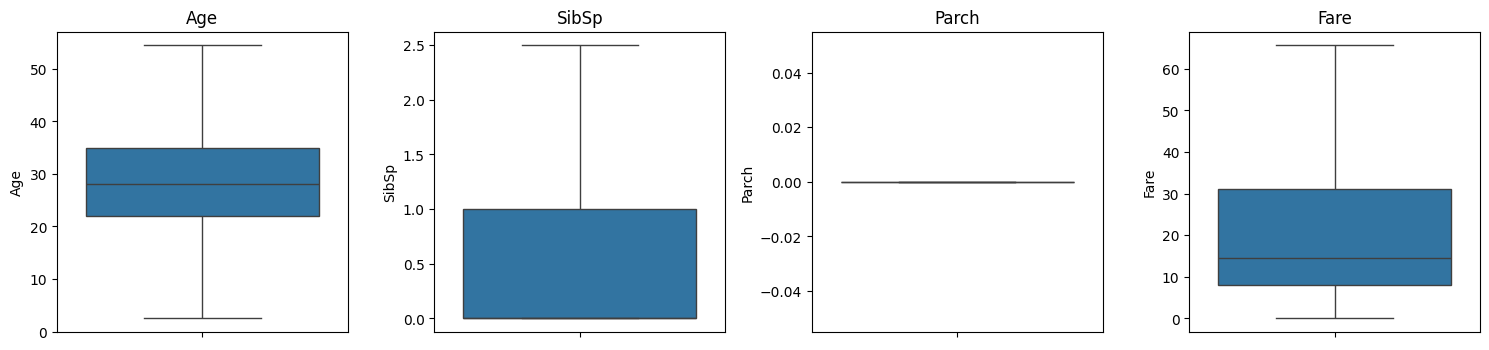

In [140]:
# Cek ulang
outlier = ['Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [141]:
# Cek jumlah outlier untuk setiap kolom numerik
for col in outlier:
    outliers = detect_outliers_iqr(data, col) # Pass the DataFrame 'df' instead of the list 'outlier'
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?

In [142]:
# e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?
# Log Transformasi (Untuk data skewed)
np.log1p(df['Fare']), np.log1p(df['Age'])

(0      2.110213
 1      4.280593
 2      2.188856
 3      3.990834
 4      2.202765
          ...   
 886    2.639057
 887    3.433987
 888    3.196630
 889    3.433987
 890    2.169054
 Name: Fare, Length: 891, dtype: float64,
 0      3.135494
 1      3.663562
 2      3.295837
 3      3.583519
 4      3.583519
          ...   
 886    3.332205
 887    2.995732
 888    3.367296
 889    3.295837
 890    3.496508
 Name: Age, Length: 891, dtype: float64)

In [143]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik yang akan di-scaling
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data numerik
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Tampilkan data yang sudah di-scaling
print(data.head())

   PassengerId  Survived  Pclass  Sex       Age     SibSp  Parch      Fare  \
0            1         0       3    1 -0.583432  0.810220    0.0 -0.820552   
1            2         1       1    0  0.742685  0.810220    0.0  2.031623   
2            3         1       3    0 -0.251903 -0.602512    0.0 -0.787578   
3            4         1       1    0  0.494038  0.810220    0.0  1.419297   
4            5         0       3    1  0.494038 -0.602512    0.0 -0.781471   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


# 3. Modelling

In [144]:
# Import model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [145]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,-0.583432,0.810220,0.0,-0.820552,2
1,2,1,0,0.742685,0.810220,0.0,2.031623,0
2,3,3,0,-0.251903,-0.602512,0.0,-0.787578,2
3,4,1,0,0.494038,0.810220,0.0,1.419297,2
4,5,3,1,0.494038,-0.602512,0.0,-0.781471,2
...,...,...,...,...,...,...,...,...
886,887,2,1,-0.169020,-0.602512,0.0,-0.539655,2
887,888,1,0,-0.832079,-0.602512,0.0,0.290823,2
888,889,3,0,-0.086138,0.810220,0.0,-0.029155,2
889,890,1,1,-0.251903,-0.602512,0.0,0.290823,0


In [146]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

Proses pembagian data menjadi data training dan testing, yang juga dikenal sebagai data splitting, adalah langkah penting dalam membangun model machine learning.

Alasan Split data:
- Mengevaluasi Performa Model
- Mencegah Overfitting
- Membandingkan Model
- Memastikan Keandalan Model

In [147]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

Proporsi 70:30 merupakan proporsi yang umum digunakan dalam pembagian data training dan testing

- Data Training: Proporsi 70% untuk data training memberikan model cukup banyak data untuk mempelajari pola dan hubungan dalam data dengan baik.

- Data Testing: Proporsi 30% untuk data testing cukup besar untuk memberikan representasi yang baik dari keseluruhan data.

- Keseimbangan yang Baik: Proporsi 70:30 memberikan keseimbangan yang baik antara memberikan model cukup banyak data untuk training dan data yang cukup untuk evaluasi yang representatif.

In [148]:
# Train model
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

c. Buatlah model klasifikasi dari 3 algortima yang berbeda. Jelaskan masing-masing model dan cara kerjanya


1. Cara Kerja Decision Tree

- Memilih Fitur Terbaik: Algoritma Decision Tree akan mencari fitur yang paling efektif dalam membagi data menjadi subset yang lebih homogen.
- Membuat Node: Node dibuat untuk fitur yang terpilih.
- Membagi Data: Data dibagi menjadi subset berdasarkan nilai dari fitur yang terpilih.
Membuat Cabang: Cabang dibuat untuk setiap subset data.
- Mengulangi Proses: Langkah 1-4 diulangi untuk setiap subset data hingga tercapai kondisi berhenti.
- Membuat Daun: Daun dibuat untuk setiap subset data yang tidak dapat dibagi lagi. Daun merepresentasikan hasil prediksi untuk data dalam subset tersebut.

2. Cara Kerja Random Forest

- Membuat Banyak Decision Tree: Random Forest akan membuat banyak Decision Tree dengan menggunakan subset data training yang dipilih secara acak (bootstrap sampling) dan subset fitur yang dipilih secara acak.
- Melatih Setiap Decision Tree: Setiap Decision Tree dilatih menggunakan subset data training dan subset fitur yang telah dipilih.
- Menggabungkan Prediksi: Untuk membuat prediksi, Random Forest akan mengumpulkan prediksi dari semua Decision Tree dan memilih prediksi yang paling banyak dipilih (majority voting untuk klasifikasi, atau rata-rata untuk regresi).

3. Cara Kerja Naive Bayes

- Menghitung Probabilitas Prior: Menghitung probabilitas setiap kelas (target) dalam data training.
- Menghitung Probabilitas Likelihood: Menghitung probabilitas setiap fitur yang diberikan kelas (target).
- Mengaplikasikan Teorema Bayes: Menggunakan teorema Bayes untuk menghitung probabilitas posterior, yaitu probabilitas setiap kelas (target) yang diberikan fitur-fitur.
- Membuat Prediksi: Memilih kelas (target) dengan probabilitas posterior tertinggi sebagai prediksi.

In [149]:
# Prediksi
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)

In [150]:
y_pred_dt, y_pred_rf, y_pred_nb

(array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0,

In [151]:
# Evaluasi model
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))


print("\nNaive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

Decision Tree:
Accuracy: 0.7388059701492538
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       157
           1       0.70      0.66      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268

[[125  32]
 [ 38  73]]

Random Forest:
Accuracy: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.67      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268

[[145  12]
 [ 37  74]]

Naive Bayes:
Accuracy: 0.7835820895522388
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       157
           1       0.71      0.80      0.75       111

    

d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?

1. Decision Tree
Confusion Matrix:
- 125 penumpang diprediksi tidak selamat dan memang benar tidak selamat (True Negative).
- 32 penumpang diprediksi tidak selamat tetapi sebenarnya selamat (False Negative).
- 38 penumpang diprediksi selamat tetapi sebenarnya tidak selamat (False Positive).
- 73 penumpang diprediksi selamat dan memang benar selamat (True Positive).


2. Random Forest
Confusion Matrix:
- 145 True Negative
- 12 False Negative
- 37 False Positive
- 74 True Positive

3. Naive Bayes
Confusion Matrix:
- 121 True Negative
- 36 False Negative
- 22 False Positive
- 89 True Positive

e. Bandingkan hasil dari ketiga algoriuna tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.


Berdasarkan hasil evaluasi yang Anda berikan, Random Forest memiliki performa terbaik dengan akurasi 81.71%, diikuti oleh Naive Bayes (78.35%) dan Decision Tree (73.88%).

Random Forest adalah model terbaik untuk dataset Titanic ini, karena memberikan akurasi dan performa yang lebih baik secara keseluruhan dibandingkan Decision Tree dan Naive Bayes. Keunggulan ini kemungkinan disebabkan oleh sifat ensemble dan kemampuannya dalam menangani kompleksitas data.


# 4. Evaluasi

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang


1. Precision:

- Kelas 0 (Tidak Selamat): 0.80. Ini berarti dari semua penumpang yang diprediksi tidak selamat oleh model, 80% memang benar-benar tidak selamat.
- Kelas 1 (Selamat): 0.86. Ini berarti dari semua penumpang yang diprediksi selamat oleh model, 86% memang benar-benar selamat.

2. Recall:

- Kelas 0 (Tidak Selamat): 0.92. Ini berarti dari semua penumpang yang sebenarnya tidak selamat, model berhasil memprediksi 92% dengan benar.
- Kelas 1 (Selamat): 0.67. Ini berarti dari semua penumpang yang sebenarnya selamat, model berhasil memprediksi 67% dengan benar.

b. Berapa banyak penumpang yang diprediksi selarnat, dan berapa di antaranya benar-benar selamat?

Confusion Matrix dan Prediksi Penumpang Selamat

- 145 (True Negative): Jumlah penumpang yang diprediksi tidak selamat dan memang benar tidak selamat.
- 12 (False Negative): Jumlah penumpang yang diprediksi tidak selamat tetapi sebenarnya selamat.
- 37 (False Positive): Jumlah penumpang yang diprediksi selamat tetapi sebenarnya tidak selamat.
- 74 (True Positive): Jumlah penumpang yang diprediksi selamat dan memang benar selamat.




- Berapa banyak penumpang yang diprediksi selamat?
Jumlah penumpang yang diprediksi selamat adalah jumlah dari False Positive dan True Positive, yaitu 37 + 74 = 111.
- Berapa di antaranya benar-benar selamat?
Jumlah penumpang yang diprediksi selamat dan benar-benar selamat adalah True Positive, yaitu 74.

Kesimpulan:

Model Random Forest memprediksi 111 penumpang akan selamat, dan dari jumlah tersebut, 74 penumpang memang benar-benar selamat.